In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import data

orders = pd.read_csv("../data/processed/customer_orders.csv")

# Regressão Logística

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


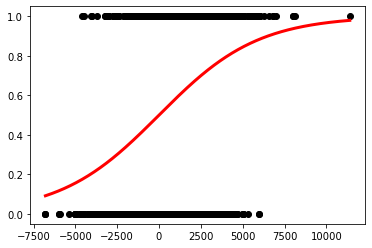

In [7]:
# sklearn imports for machine learning models

from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Criando nossas arrays Unidimensionais (1D) para serem utilizadas pelo sklearn na produção de nossa regressão logística

X = np.array(np.rint(orders["price"])).reshape(-1, 1)
y = np.array(orders["has_delivery_days"]).reshape(-1, 1)

m = int(X.min())
mx = int(X.max())
me = int(X.mean())

X_test = np.linspace(m, mx, me)

# ml
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.clf()
plt.scatter(X.ravel(), y, color="black")

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

plt.show()

# Árvore de Decisão

In [8]:
X = np.array(np.rint(orders["price"])).reshape(-1, 1)
Y = np.array(orders["has_delivery_days"]).reshape(-1, 1)

m = int(X.min())
mx = int(X.max())
me = int(X.mean())

X_test = np.linspace(m, mx, me)

In [9]:
from sklearn import tree
from sklearn.tree import export_text

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [30]:
text = export_text(clf, feature_names=["price"])

[Text(167.4, 181.2, 'X[0] <= 5.5\ngini = 0.498\nsamples = 33607\nvalue = [15744, 17863]'),
 Text(83.7, 108.72, 'X[0] <= 4.5\ngini = 0.252\nsamples = 3768\nvalue = [3212, 556]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[0] <= 203.5\ngini = 0.487\nsamples = 29839\nvalue = [12532, 17307]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

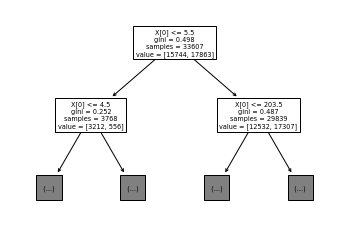

In [13]:
tree.plot_tree(clf,max_depth=1)

In [11]:
clf.predict([[-600]])

array([0], dtype=int64)

In [10]:
clf.predict([[600]])

array([1], dtype=int64)